,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


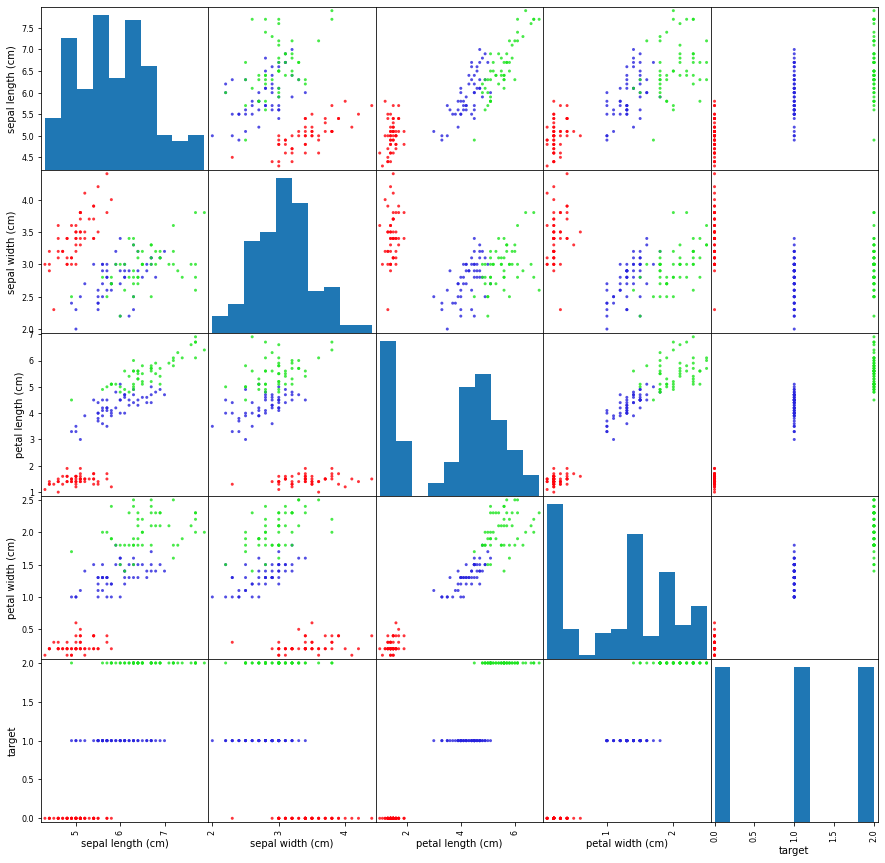

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
iris = load_iris()

iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']
color_dictionary = {1: "#FE010A", 2: "#2722DD", 3: "#1BE41D"}
colors = iris_data["target"].map(lambda x: color_dictionary.get(x + 1))
ax = scatter_matrix(iris_data, color=colors, alpha=0.8, figsize=(15, 15), diagonal='hist')



from pandas.plotting import scatter_matrix
iris_data

In [ ]:
# Perceptron Learning Algorithm

def predict(W, X):
        """ Return class label after each setp """
        return np.where(net_input(W, X) >= 0.0, 1, -1)   

def net_input(W, X):
        """ Calculate net input """
        return np.dot(X, W[1:]) + 1*W[0]

def plot_boundary(W,X,color_x1,l_x1,color_x2,l_x2):
        """Function to plot the boundary defined by the weights. Given equation."""
        """w0 + w1*x1 + w2*x2 = 0, used to generate the line."""
        x_vals = []
        y_vals = []
        for i in range(0,10):
            x_vals.append(i) 
            result = (-1)*(W[1]*i + W[0])/W[2] #Uses the equation to find y_vals using x_vals as input and weights. 
            y_vals.append(result)
            
    # This part here define the x-axis and y-axis style according to the data we are using (Iris data).
    # Hence: you can edit the names depeneds on the features/labels you are using 
         
        plt.scatter(X[:50,0],X[:50,1],color=color_x1,marker='o',label=l_x1)
        plt.scatter(X[50:100,0],X[50:100,1],color=color_x2,marker='o',label=l_x2) 
        plt.title("Sepal Length vs Petal Length")
        plt.xlabel('Sepal Length')    
        plt.ylabel('Petal Length')
        plt.legend(loc='upper left')
        plt.plot(x_vals,y_vals, 'black') #Plot using found values that form the line. 
        plt.show()

def plot_errors(error):
    plt.plot(range(1, len(error) + 1), error,marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('Number of misclassifications')
    plt.show()   

def fit(n_iter, X, y,color_x1,l_x1,color_x2,l_x2):
        W = np.zeros(1 + X.shape[1])
        errors_ = []        
        for i in range(n_iter):
            for j, (xi, target) in enumerate(zip(X,y)):
                update = target - predict(W, xi)
                W[1:] += update*xi
                W[0] += update
                
            # errors on whole dataset 
            errors = 0
            for j, (xi, target) in enumerate(zip(X, y)):
                if predict(W, xi) != target:
                    errors += 1
            # -------------------------------------------
            errors_.append(errors) 
            i += 1
            print ("Iteration: ", i)
            print("Weights: ", W)
            plot_boundary(W,X,color_x1,l_x1,color_x2,l_x2) #When weights are updated we plot the boundary
        plot_errors(errors_)



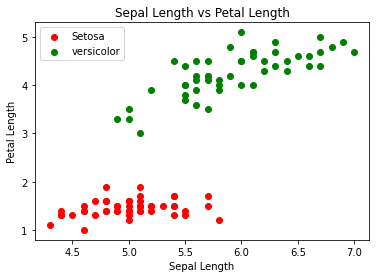

Iteration:  1
Weights:  [0.  3.8 6.6]


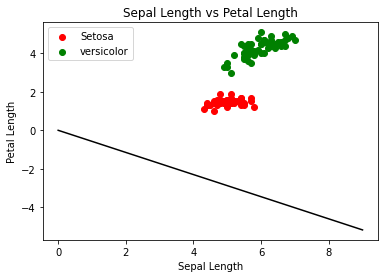

Iteration:  2
Weights:  [ 0.   7.6 13.2]


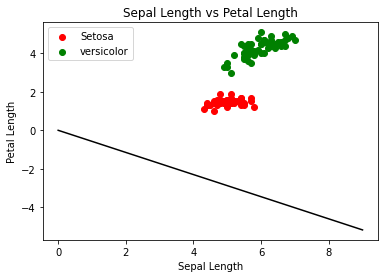

Iteration:  3
Weights:  [-2.   2.2 16.8]


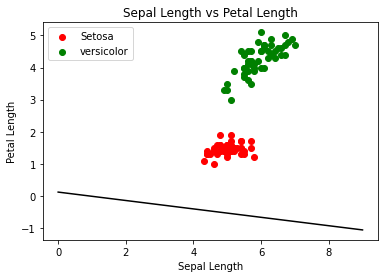

Iteration:  4
Weights:  [-2.   3.4 21. ]


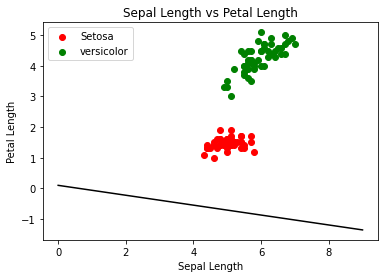

Iteration:  5
Weights:  [-4.  -6.8 18.2]


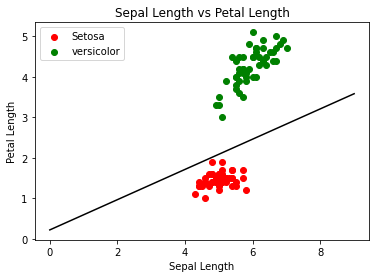

Iteration:  6
Weights:  [-4.  -6.8 18.2]


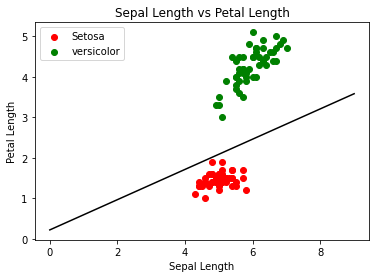

Iteration:  7
Weights:  [-4.  -6.8 18.2]


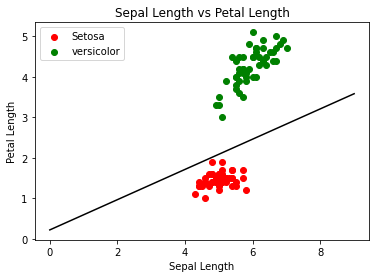

Iteration:  8
Weights:  [-4.  -6.8 18.2]


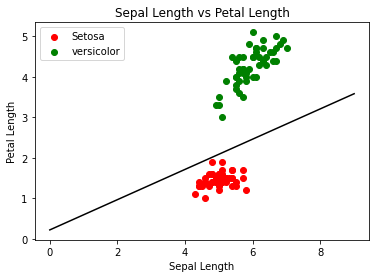

Iteration:  9
Weights:  [-4.  -6.8 18.2]


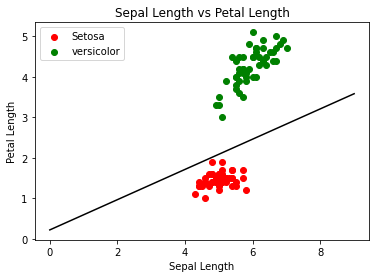

Iteration:  10
Weights:  [-4.  -6.8 18.2]


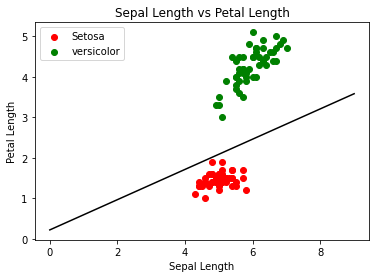

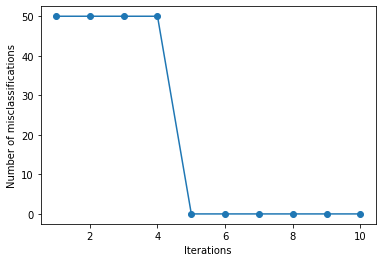

In [ ]:
## Task 1 Classification setosa versicolor, same 2 features

"""Get the labels of both classes"""
setosa_label = iris_data.iloc[0:50,4].values
versicolor_label = iris_data.iloc[50:100,4].values
labels = np.concatenate((setosa_label,versicolor_label))
y = np.where(labels == 0, -1, 1)
"""Get the 2 features for both flowers"""
X_setosa = iris_data.iloc[0:50, [0,2]]   # from data 0:50, use colums 0 and 2
X_versicolor = iris_data.iloc[50:100, [0,2]] # idem 
X = np.concatenate((X_setosa,X_versicolor))
# Plot the graph that shows the classes can be linearly seperable:
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='Setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='green',marker='o',label='versicolor') 
plt.title("Sepal Length vs Petal Length")
plt.xlabel('Sepal Length')    
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.show()
# Perceptron Algorithm classification:
fit(10, X, y,'red','Setosa','green','versicolor')

In [ ]:
# Final weights: [-4,0 -6.8 18.2]

In [ ]:
# Perceptron Learning Algorithm

def predict(W, X):
        """ Return class label after each setp """
        return np.where(net_input(W, X) >= 0.0, 1, -1)   

def net_input(W, X):
        """ Calculate net input """
        return np.dot(X, W[1:]) + 1*W[0]

def plot_boundary(W,X,color_x1,l_x1,color_x2,l_x2):
        """Function to plot the boundary defined by the weights. Given equation."""
        """w0 + w1*x1 + w2*x2 = 0, used to generate the line."""
        x_vals = []
        y_vals = []
        for i in range(0,10):
            x_vals.append(i) 
            result = (-1)*(W[1]*i + W[0])/W[2] #Uses the equation to find y_vals using x_vals as input and weights. 
            y_vals.append(result)
            
    # This part here define the x-axis and y-axis style according to the data we are using (Iris data).
    # Hence: you can edit the names depeneds on the features/labels you are using 
         
        plt.scatter(X[:50,0],X[:50,1],color=color_x1,marker='o',label=l_x1)
        plt.scatter(X[50:100,0],X[50:100,1],color=color_x2,marker='o',label=l_x2) 
        plt.title("Sepal Length vs Petal Length")
        plt.xlabel('Sepal Length')    
        plt.ylabel('Petal Length')
        plt.legend(loc='upper left')
        plt.plot(x_vals,y_vals, 'black') #Plot using found values that form the line. 
        plt.show()

def plot_errors(error):
    plt.plot(range(1, len(error) + 1), error,marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('Number of misclassifications')
    plt.show()   

def fit(n_iter, X, y,color_x1,l_x1,color_x2,l_x2):
        W = np.zeros(1 + X.shape[1])
        errors_ = []        
        min_error = 10000
        #W_opt = []
        W_opt = np.zeros(1 + X.shape[1])
        Best_itr = 0

        for i in range(n_iter):
            
            # errors on whole dataset 
            errors = 0
            for j, (xi, target) in enumerate(zip(X, y)):
                if predict(W, xi) != target:
                    errors += 1
            # -------------------------------------------
            errors_.append(errors) 

            if errors < min_error: 
              min_error = errors
              d\';lkjW_opt[0:3] = W[0:3] 
              W_opt = W
              W_opt = np.copy(W) 
              #W_opt.clear()
              #W_opt.append(W[0])
              #W_opt.append(W[1])
              #W_opt.append(W[2])
              Best_itr = i

            for j, (xi, target) in enumerate(zip(X,y)):
                update = target - predict(W, xi)
                W[1:] += update*xi
                W[0] += update

            i += 1
            print ("Iteration: ", i)
            print("Weights: ", W)
            plot_boundary(W,X,color_x1,l_x1,color_x2,l_x2) #When weights are updated we plot the boundary
        plot_errors(errors_)
        print('Mininum misclassificaton error is:',min_error)
        print('W:',W_opt,'iteration:',Best_itr)
        print('Optimal W plot:')
        plot_boundary(W_opt,X,color_x1,l_x1,color_x2,l_x2)
        


In [ ]:
# Task 2： Versicolor and Virginica classes, same 2 features

"""Get the labels of both classes"""
versicolor_label = iris_data.iloc[50:100,4].values
virginica_label = iris_data.iloc[100:150,4].values
labels = np.concatenate((versicolor_label,virginica_label))
y = np.where(labels == 1, -1, 1)
"""Get the 2 features for both flowers"""
X_versicolor = iris_data.iloc[50:100, [0,2]] 
X_virginica = iris_data.iloc[100:150, [0,2]]   
X = np.concatenate((X_versicolor,X_virginica))
# Plot the graph that shows the classes cannot be linearly seperable:
plt.scatter(X[:50,0],X[:50,1],color='green',marker='o',label='versicolor')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='o',label='virginica') 
plt.title("Sepal Length vs Petal Length")
plt.xlabel('Sepal Length')    
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.show()
# Perceptron Algorithm classification:
fit(100, X, y,'green','versicolor','blue','virginica')



# Pocket Algorithm
# Perceptron is for the linearly classifying data while pocket algorithm is used when a data is not linearly seperable and we want to seperate data with the minimal error



  


Output hidden; open in https://colab.research.google.com to view.